<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Hydrogen_radial_wavefunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Radial Wavefunctions of the Hydrogen Atom
The solution to the Schr\"{o}dinger equation for the hydrogen atom gives results that include the spherical harmonics for the angular portion and a radial (depending on $r$) portion.
$$\hat{H}\psi=E\psi=ER(r)\Theta(\theta)\Phi(\phi)=ER(r)Y_l^{m_l}(\theta,\phi)$$

We have already explored the angular portion of this problem in the particle on a sphere or diatomic rigid rotor problem. We'll come back to that problem in the context of angular momentum later. But the new part of the hydrogen atom solutions is the radial wavefunction.

The solution to the radial part of the hydrogen atom problem gives us $$R(r)=\sqrt{\dfrac{2Z}{nr}}^3\sqrt{\dfrac{(n-l-1)!}{2n(n_1)!}}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import genlaguerre


In [ ]:
# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius - assume atomic units

In [ ]:
# Define the radial wavefunction formula
def radial_wavefunction(r, n, l):
    prefactor = math.sqrt(((2*Z/n/a0)**3) * math.factorial(n-l-1) / (2*n*(math.factorial(n+l))))
    exponential_term = np.exp(-Z*r/n/a0)
    r_term=(2*Z*r/n/a0)**l
    laguerre_term = genlaguerre(n-l-1, 2*l+1)(2*Z*r/n/a0) # use the laguerre polynomials from scipy
    return prefactor * r_term * exponential_term * laguerre_term
    # the wavefunction is a normalization factor, an exponential, an r**l term, and a Laguerre polynomial.

In [195]:
def normaliz(n, l):
  intg,_=quad(lambda r: np.abs(radial_wavefunction(r, n, l))**2, 0, np.inf)
  return 1/np.sqrt(intg)


3.4641016151377366

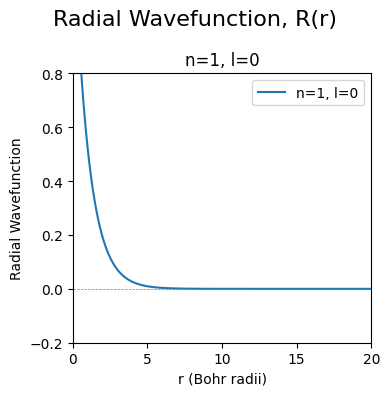

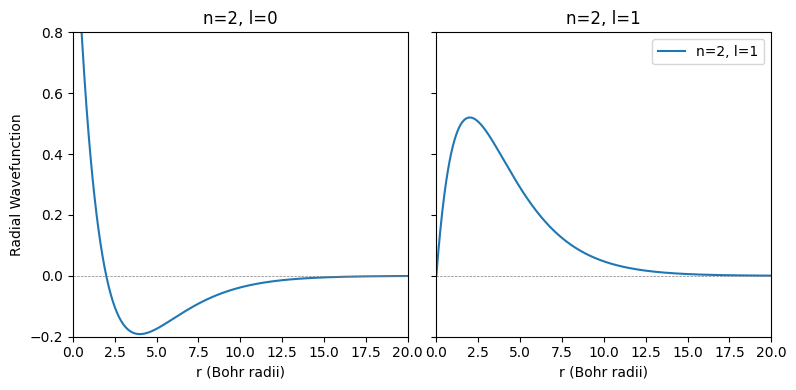

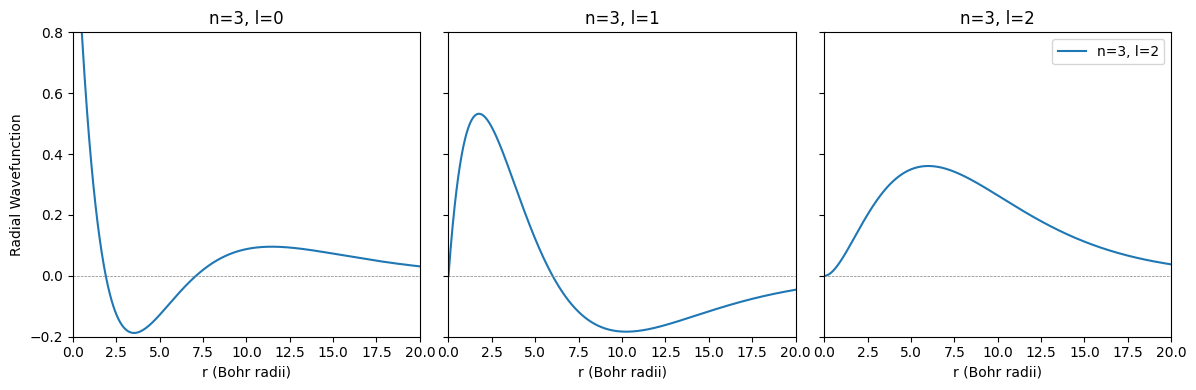

In [200]:
# Plot several wavefunctions

# Define range of r values
r_values = np.linspace(0, 20*a0, 1000) # from 0 to 20 bohr radii

# Plot radial wavefunctions for different n values
for n in range(1, 4):
    num_plots = n
    fig, axs = plt.subplots(1, num_plots, figsize=(12/3*num_plots, 4))
    for l in range(n):
        ax = axs[l] if n > 1 else axs
        ax.plot(r_values, radial_wavefunction(r_values, n, l)*normaliz(n,l), label=f"n={n}, l={l}")
        ax.set_title(f"n={n}, l={l}")
        ax.set_xlabel("r (Bohr radii)")
        if l==0:
          ax.set_ylabel("Radial Wavefunction") # y-axis label only on far left plots
        else:
          ax.set_yticklabels([])
        ax.set_xlim(0, 20)  # Set x-axis limits
        ax.set_ylim(-0.2, .8)  # Set y-axis limits
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
    if n==1:
      plt.suptitle('Radial Wavefunction, R(r)', fontsize=16)
    fig.tight_layout()
    plt.legend()
    plt.show()


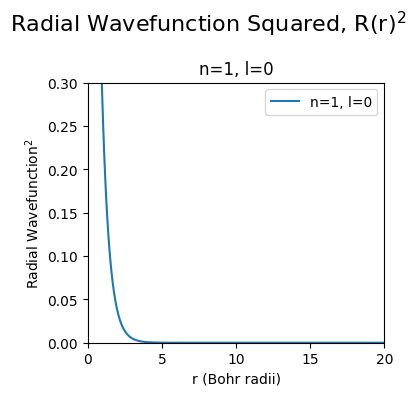

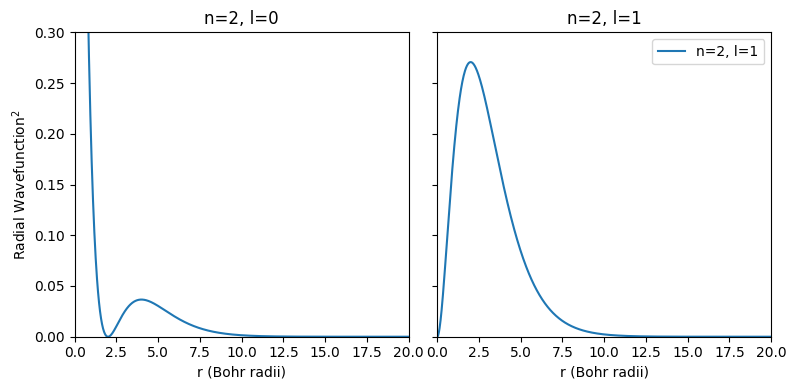

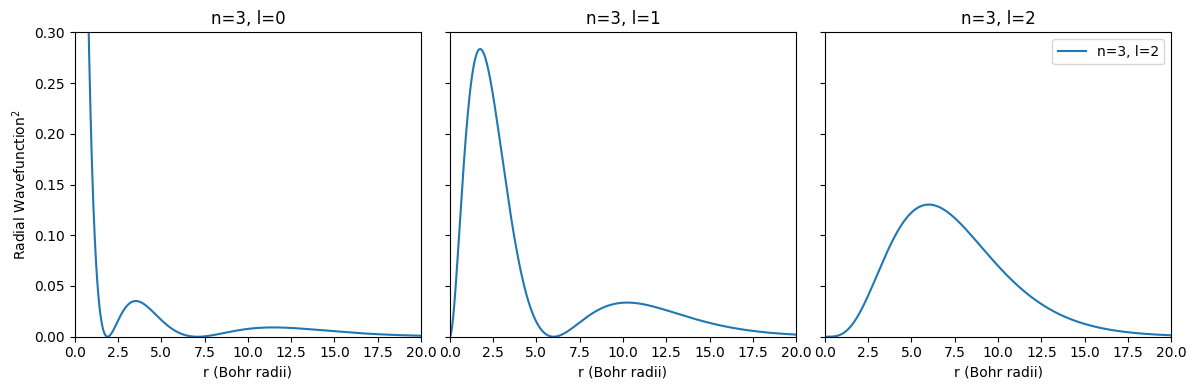

In [202]:
# Define range of r values
r_values = np.linspace(0, 20*a0, 1000) # from 0 to 20 bohr radii

# Plot radial wavefunctions for different n values
for n in range(1, 4):
    num_plots = n
    fig, axs = plt.subplots(1, num_plots, figsize=(12/3*num_plots, 4))
    for l in range(n):
        ax = axs[l] if n > 1 else axs
        ax.plot(r_values, np.abs(radial_wavefunction(r_values, n, l))**2*normaliz(n,l)**2, label=f"n={n}, l={l}")
        ax.set_title(f"n={n}, l={l}")
        ax.set_xlabel("r (Bohr radii)")
        if l==0:
          ax.set_ylabel("Radial Wavefunction$^2$") # y-axis label only on far left plots
        else:
          ax.set_yticklabels([])
        ax.set_xlim(0, 20)  # Set x-axis limits
        ax.set_ylim(-0.0, .3)  # Set y-axis limits
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
    if n==1:
      plt.suptitle('Radial Wavefunction Squared, R(r)$^2$', fontsize=16)
    fig.tight_layout()
    plt.legend()
    plt.show()

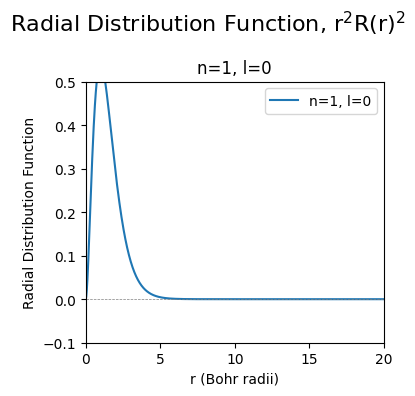

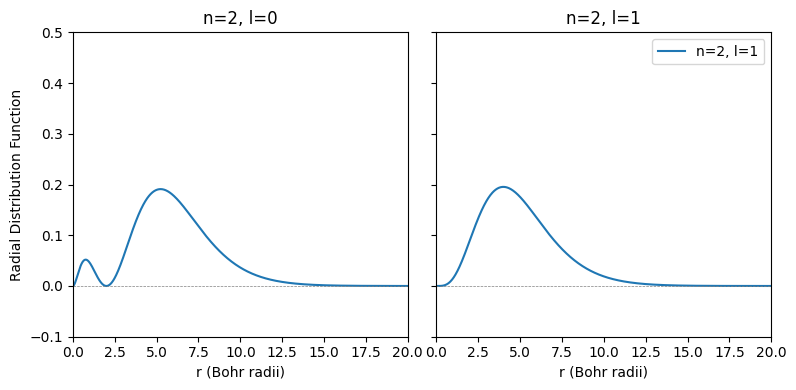

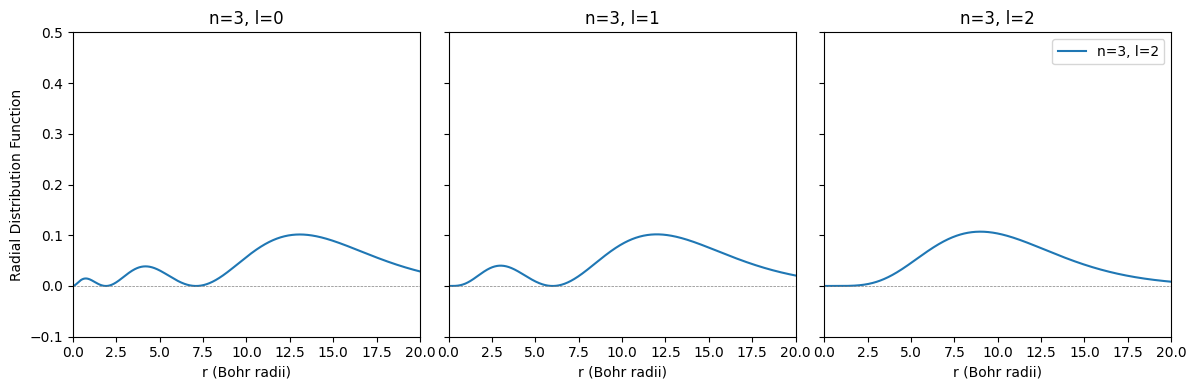

In [207]:
# Plot radial distribution functions for different n values
for n in range(1, 4):
    num_plots = n
    fig, axs = plt.subplots(1, num_plots, figsize=(4*num_plots, 4),sharey=True)
    for l in range(n):
        ax = axs[l] if n > 1 else axs
        ax.plot(r_values, r_values**2*radial_wavefunction(r_values, n, l)**2, label=f"n={n}, l={l}")
        if l==0:
          ax.set_ylabel("Radial Distribution Function")
        ax.set_title(f"n={n}, l={l}")
        ax.set_xlabel("r (Bohr radii)")
        ax.set_xlim(0, 20)  # Set x-axis limits
        ax.set_ylim(-0.1, .5)  # Set y-axis limits
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
    if n==1:
      plt.suptitle('Radial Distribution Function, r$^2$R(r)$^2$', fontsize=16)
    fig.tight_layout()

    plt.legend()
    plt.show()

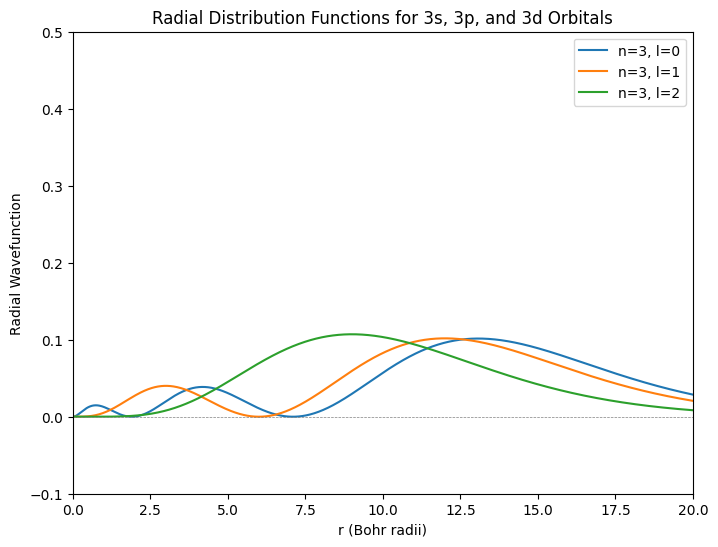

In [ ]:
# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius

# Define range of r values
r_values = np.linspace(0, 20*a0, 1000)

# Plot radial wavefunctions for different n values
fig, ax = plt.subplots(figsize=(8, 6))
for l in range(3):
    n = 3
    ax.plot(r_values, r_values**2*radial_wavefunction(r_values, n, l)**2, label=f"n={n}, l={l}")
ax.set_title("Radial Distribution Functions for 3s, 3p, and 3d Orbitals")
ax.set_xlabel("r (Bohr radii)")
ax.set_ylabel("Radial Wavefunction")
ax.set_xlim(0, 20)  # Set x-axis limits
ax.set_ylim(-0.1, .5)  # Set y-axis limits
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
plt.legend()
plt.show()

In [ ]:
from scipy.integrate import quad

# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius

# Define function to calculate average Bohr radius
def average_bohr_radius(n, l):
    integrand = lambda r: r*r**2 * np.abs(radial_wavefunction(r, n, l))**2
    result, _ = quad(integrand, 0, np.inf)
    return result
# Calculate and print average Bohr radius for each orbital
for n in range(1, 4):
    for l in range(n):
        average_r = average_bohr_radius(n, l)
        print(f"Average Bohr radius for n={n}, l={l}: {average_r:.2f} Bohr radii")



Average Bohr radius for n=1, l=0: 0.53 Bohr radii
Average Bohr radius for n=2, l=0: 6.00 Bohr radii
Average Bohr radius for n=2, l=1: 5.00 Bohr radii
Average Bohr radius for n=3, l=0: 24.80 Bohr radii
Average Bohr radius for n=3, l=1: 34.45 Bohr radii
Average Bohr radius for n=3, l=2: 43.40 Bohr radii


In [ ]:
from scipy.signal import find_peaks

# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius

# Define function for r^2 * |R_{nl}(r)|^2
def radial_distribution_function(n, l):
    return lambda r: r**2 * radial_wavefunction(r, n, l)**2

# Find the first maximum of r^2 * |R_{nl}(r)|^2 for specified orbitals
orbitals = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]
for n, l in orbitals:
    # Define range of r values
    r_values = np.linspace(0.001, 40, 10000)
    # Compute radial distribution function
    radial_dist_func = radial_distribution_function(n, l)(r_values)
    # Find peaks
    peaks, _ = find_peaks(radial_dist_func)
    peak_locations = r_values[peaks]
    # Print the locations of all peaks
    print(f"For the {n}{['s', 'p', 'd'][l]} orbital, the maxima of the radial distribution function occur at:")
    for i, peak_location in enumerate(peak_locations):
        print(f"- Peak {i+1}: r = {peak_location:.2f} Bohr radii")



For the 1s orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 1.00 Bohr radii
For the 2s orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 0.77 Bohr radii
- Peak 2: r = 5.24 Bohr radii
For the 2p orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 4.00 Bohr radii
For the 3s orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 0.74 Bohr radii
- Peak 2: r = 4.19 Bohr radii
- Peak 3: r = 13.07 Bohr radii
For the 3p orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 3.00 Bohr radii
- Peak 2: r = 12.00 Bohr radii
For the 3d orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 9.00 Bohr radii
